Regression from Scratch in Numpy vs. PyTorch

Regression in Numpy

In [0]:
import numpy as np
import matplotlib.pyplot as plt

In [0]:
X = np.array([1,2,4,6,8,10,12,13,14,16,16,18,20,22,24])
Y = np.array([39,42,43,46,47,56,60,59,64,66,68,72,71,75,80])

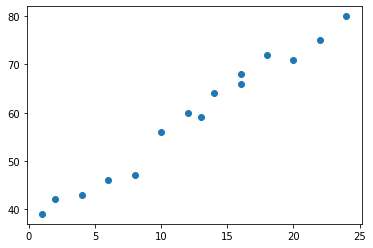

In [3]:
plt.scatter(X,Y)

As we can see there is linear relationship between X and Y.(We'll discuss more about correlation in another post). We'll use linear regression to build prediction model

In [4]:
'''Y = a*X+b is the equation of line/linear regression model.
Goal here is to find the values of a and b.
There are multiple techniques to achieve this:
1.Matrix calculations: Put all data into matrices to perform optimization.Used for small dataset because of memory requirement.
2.Gradient Descent : Try to minimize error/difference between actual and predicted values using derivatives.
3.Regularization: While minimizing error,also try to reduce impact of unnecessary features.
4.Simple linear regression:If there are single input varaible and single output variable,use covariance and variance to find a and b.

More detailed explaination of above techniques is not in the scope here.
We'll implement method 2 i.e Gradient Descent here-more specific-Batch Gradient Descent.
Weights(a,b) are updated at end of complete batch/all rows as follow:
new a = old a - (learning_rate*gradient_a)
new b = old b - (learning_rate*gradient_b)

'''


"Y = a*X+b is the equation of line/linear regression model.\nGoal here is to find the values of a and b.\nThere are multiple techniques to achieve this:\n1.Matrix calculations: Put all data into matrices to perform optimization.Used for small dataset because of memory requirement.\n2.Gradient Descent : Try to minimize error/difference between actual and predicted values using derivatives.\n3.Regularization: While minimizing error,also try to reduce impact of unnecessary features.\n4.Simple linear regression:If there are single input varaible and single output variable,use covariance and variance to find a and b.\n\nMore detailed explaination of above techniques is not in the scope here.\nWe'll implement method 2 i.e Gradient Descent here-more specific-Batch Gradient Descent.\nWeights(a,b) are updated at end of complete batch/all rows as follow:\nnew a = old a - (learning_rate*gradient_a)\nnew b = old b - (learning_rate*gradient_b)\n\n"

In [0]:
np.random.seed(2)
epochs=15
learning_rate = 0.001
w = np.random.randn()
b = np.random.randn()
y_pred = np.empty(len(Y))

In [6]:
for i in range(epochs):
    print("-----------epoch:{}--------".format(i))
    #prediction
    y_pred = w*X +b 

    #Error/loss calculation is Mean Squared Error
    error = np.mean((Y - y_pred)**2)  
    print('Total Error:{}'.format(error))

    #Gradient calculation
    gradient_a = np.mean(-2*X*(Y-y_pred))
    gradient_b = np.mean(-2*(Y-y_pred))

    #Update weights
    w -= learning_rate*gradient_a
    b -= learning_rate*gradient_b

  
   

-----------epoch:0--------
Total Error:4393.679411741339
-----------epoch:1--------
Total Error:1761.2933993839647
-----------epoch:2--------
Total Error:829.147694180196
-----------epoch:3--------
Total Error:498.94421785640026
-----------epoch:4--------
Total Error:381.8486450156428
-----------epoch:5--------
Total Error:340.20059390876725
-----------epoch:6--------
Total Error:325.26367603059253
-----------epoch:7--------
Total Error:319.7835764526846
-----------epoch:8--------
Total Error:317.6516893015521
-----------epoch:9--------
Total Error:316.705363217721
-----------epoch:10--------
Total Error:316.1789469743335
-----------epoch:11--------
Total Error:315.80137420708223
-----------epoch:12--------
Total Error:315.47667816740153
-----------epoch:13--------
Total Error:315.17088323869484
-----------epoch:14--------
Total Error:314.8719607426561


In [7]:
print(w,b)

4.042799282999869 0.4771951521774575


In [8]:
'''Error is reducing with increment in epochs. Number of epochs and learning rate are hyperparameters to tune. 
Let's not play around with it and jumpt to PyTorch'''

"Error is reducing with increment in epochs. Number of epochs and learning rate are hyperparameters to tune. \nLet's not play around with it and jumpt to PyTorch"

Regression in PyTorch

In [0]:
import torch

In [0]:
#initialise data/features and target
X_tensor = torch.from_numpy(X)
Y_tensor = torch.from_numpy(Y)

In [11]:
#Initialise weights
'''Here unlike numpy we have to mention that these variables are trainable(need to calculate derivatives).
This can be done using requires_grad:'''

'Here unlike numpy we have to mention that these variables are trainable(need to calculate derivatives).\nThis can be done using requires_grad:'

In [0]:
torch.random.seed = 2
w_tensor = torch.randn(1,requires_grad=True,dtype=torch.float)
b_tensor = torch.randn(1,requires_grad=True,dtype=torch.float)
epochs=15
learning_rate = 0.001

In [13]:
w_tensor

tensor([-1.2575], requires_grad=True)

In [14]:
#Model without PyTorch in-built methods
for i in range(epochs):
    print("-----------epoch:{}--------".format(i))
    #prediction
    y_pred = w_tensor*X_tensor +b_tensor 

    #Error/loss calculation is Mean Squared Error
    error = ((Y_tensor - y_pred)**2).mean()
    print('Total Error:{}'.format(error))

    '''Now no need to calculate gradients,PyTorch will do it if we tell which function/variable needs gradient calculation using backward()'''
    error.backward()

    '''Actual values of gradients can be seen using grad attribute'''
    #print(w_tensor.grad,b_tensor.grad)
    
    '''We can not directly use gradients in normal calculation,so use no_grad() method to get variables out of scope of computation graph '''
    
    with torch.no_grad():
       w_tensor-= learning_rate*w_tensor.grad
       b_tensor-= learning_rate*b_tensor.grad
      

     #After each step,Reinitilaise gradients because PyTorch holds on to gradients
    w_tensor.grad.zero_()
    b_tensor.grad.zero_()



-----------epoch:0--------
Total Error:6396.83935546875
-----------epoch:1--------
Total Error:2495.30615234375
-----------epoch:2--------
Total Error:1113.8157958984375
-----------epoch:3--------
Total Error:624.5057983398438
-----------epoch:4--------
Total Error:451.05792236328125
-----------epoch:5--------
Total Error:389.4356994628906
-----------epoch:6--------
Total Error:367.40386962890625
-----------epoch:7--------
Total Error:359.3885498046875
-----------epoch:8--------
Total Error:356.33563232421875
-----------epoch:9--------
Total Error:355.03997802734375
-----------epoch:10--------
Total Error:354.3665466308594
-----------epoch:11--------
Total Error:353.9134521484375
-----------epoch:12--------
Total Error:353.53887939453125
-----------epoch:13--------
Total Error:353.1919860839844
-----------epoch:14--------
Total Error:352.8553771972656


In [15]:
#Model with PyTorch in-built methods
optimizer = torch.optim.SGD([w_tensor, b_tensor], lr=learning_rate) 
loss = torch.nn.MSELoss(reduction='mean')
for i in range(epochs):
    print("-----------epoch:{}--------".format(i))
    #prediction
    y_pred = w_tensor*X_tensor +b_tensor 

    #Error/loss calculation is Mean Squared Error
    error = loss(Y_tensor, y_pred)  
    print('Total Error:{}'.format(error))

    '''Now no need to calculate gradients,PyTorch will do it if we tell which function/variable needs gradient calculation using backward()'''
    error.backward()

    #Update weights using Optimizer
    optimizer.step()

    #After each step,Reinitilaise gradients because PyTorch holds on to gradients
    #Reinitilaise gradients using Optimizer
    optimizer.zero_grad()   

-----------epoch:0--------
Total Error:352.5224914550781
-----------epoch:1--------
Total Error:352.1910095214844
-----------epoch:2--------
Total Error:351.8605041503906
-----------epoch:3--------
Total Error:351.5302734375
-----------epoch:4--------
Total Error:351.20050048828125
-----------epoch:5--------
Total Error:350.87109375
-----------epoch:6--------
Total Error:350.5419616699219
-----------epoch:7--------
Total Error:350.2131042480469
-----------epoch:8--------
Total Error:349.8846435546875
-----------epoch:9--------
Total Error:349.55645751953125
-----------epoch:10--------
Total Error:349.22845458984375
-----------epoch:11--------
Total Error:348.9008483886719
-----------epoch:12--------
Total Error:348.5736389160156
-----------epoch:13--------
Total Error:348.2466735839844
-----------epoch:14--------
Total Error:347.91998291015625


In [16]:
'''Till now,we've explored loss calculation and Optimizers.
The only manual step remaining is prediction step which also can be done by Model class,but we'll explore more on Model class and neural network in PyTorch in next 
article. If you liked the post CLAP!CLAP!CLAP! and your response is most WELCOME! '''


"Till now,we've explored loss calculation and Optimizers.\nThe only manual step remaining is prediction step which also can be done by Model class,but we'll explore more on Model class and neural network in PyTorch in next \narticle. If you liked the post CLAP!CLAP!CLAP! and your response is most WELCOME! "